In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Datasets/ETH.csv")

In [3]:
df.head()

,Crypto,Date,Open,High,Low,Close
0,ETH,12/31/21,3736.59,3812.67,3622.51,3687.67
1,ETH,12/30/21,3725.60,3768.63,3590.00,3733.98
2,ETH,12/29/21,3809.14,3827.01,3700.00,3724.98
3,ETH,12/28/21,4061.29,4075.97,3765.23,3807.82
4,ETH,12/27/21,4086.36,4128.28,4037.00,4061.30


In [4]:
print("Dataframe Shape: " , df.shape)
print("Dataframe feature Datatypes: ", df.dtypes)
print("Dataframe Description: ", df.describe())

Dataframe Shape:  (1975, 6)
Dataframe feature Datatypes:  Crypto     object
Date       object
Open      float64
High      float64
Low       float64
Close     float64
dtype: object
Dataframe Description:                Open         High          Low        Close
count  1975.000000  1975.000000  1975.000000  1975.000000
mean   1187.961544  1226.940577  1144.599033  1188.435453
std    1164.574631  1200.438606  1123.993771  1164.606959
min      81.720000    84.150000    80.920000    81.720000
25%     215.730000   222.820000   207.525000   215.615000
50%     646.980000   669.000000   618.120000   647.000000
75%    1817.655000  1855.245000  1773.655000  1817.660000
max    4800.000000  4865.810000  4715.510000  4800.000000


In [5]:
df.isnull().sum()

Crypto    0
Date      0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.sort_values('Date')

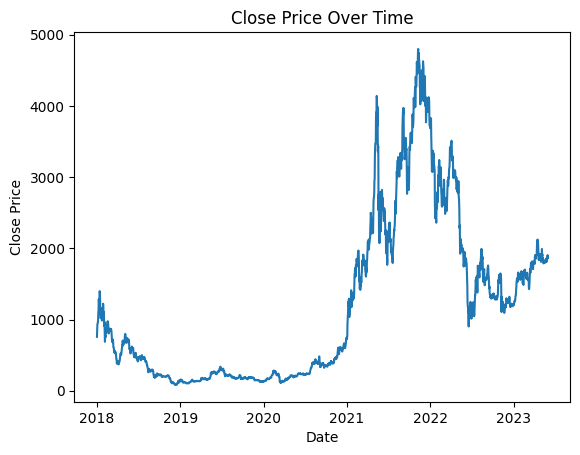

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Date'], df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


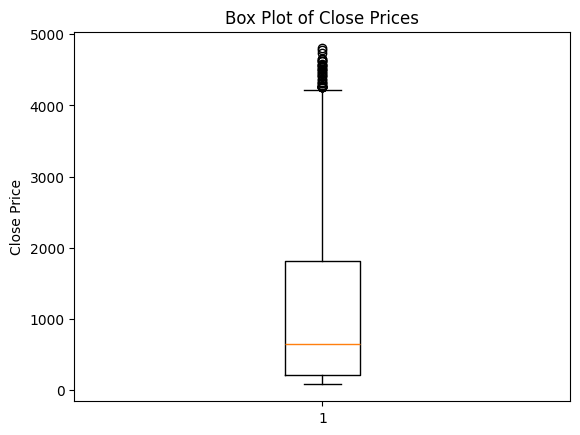

In [8]:
plt.figure()
plt.boxplot(df['Close'])
plt.title('Box Plot of Close Prices')
plt.ylabel('Close Price')
plt.show()

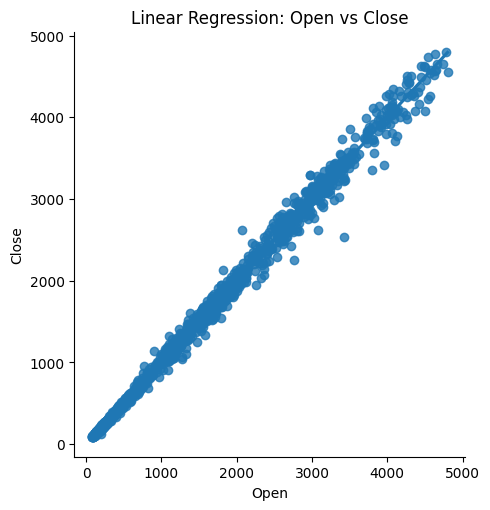

In [9]:
import seaborn as sns

sns.lmplot(x='Open', y='Close', data=df)
plt.title('Linear Regression: Open vs Close')
plt.show()

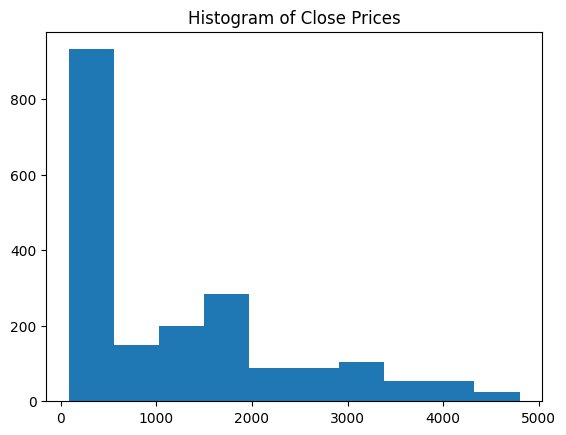

In [10]:
plt.figure()
plt.hist(df['Close'])
plt.title('Histogram of Close Prices')
plt.show()

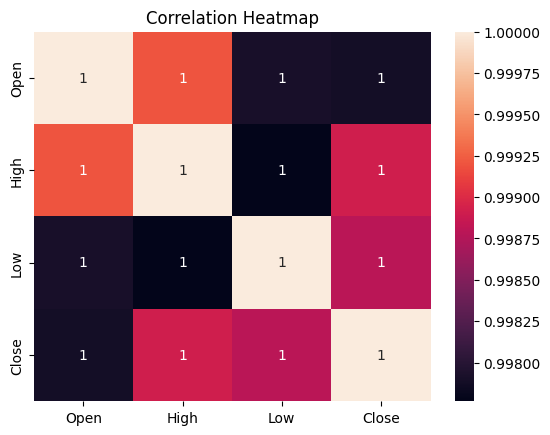

In [11]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df = df.sort_values('Date').reset_index(drop=True)

In [13]:
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))


In [14]:
df['MA_7']  = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

In [15]:
df['Volatility_7']  = df['Daily_Return'].rolling(window=7).std()
df['Volatility_14'] = df['Daily_Return'].rolling(window=14).std()

In [16]:
window = 14
delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [17]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = exp12 - exp26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [18]:
df = df.dropna().reset_index(drop=True)

In [19]:
print(df.columns)
df.head()

Index(['Crypto', 'Date', 'Open', 'High', 'Low', 'Close', 'Daily_Return',
       'Log_Return', 'MA_7', 'MA_14', 'MA_30', 'Volatility_7', 'Volatility_14',
       'RSI', 'MACD', 'MACD_Signal'],
      dtype='object')


,Crypto,Date,Open,High,Low,Close,Daily_Return,Log_Return,MA_7,MA_14,MA_30,Volatility_7,Volatility_14,RSI,MACD,MACD_Signal
0,ETH,2018-01-31,1056.00,1119.60,1011.00,1105.30,0.047539,0.046443,1107.564286,1077.249286,1087.136000,0.067100,0.065351,55.372681,33.724734,42.214813
1,ETH,2018-02-01,1105.30,1149.50,941.00,1020.09,-0.077092,-0.080226,1103.577143,1077.010714,1095.905333,0.074283,0.069190,49.809330,24.967117,38.765274
2,ETH,2018-02-02,1021.37,1024.74,734.84,910.00,-0.107922,-0.114202,1083.424286,1067.153571,1097.438667,0.084323,0.074722,42.822817,9.039103,32.820040
3,ETH,2018-02-03,909.84,995.71,831.71,965.53,0.061022,0.059233,1063.428571,1053.421429,1098.356333,0.085646,0.070464,39.403393,0.886624,26.433357
4,ETH,2018-02-04,965.60,966.90,782.00,823.56,-0.147038,-0.159041,1006.517143,1037.311429,1094.407000,0.078915,0.076476,38.008549,-16.835993,17.779487


In [20]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = [
    'Open','High','Low','Close',
    'Daily_Return','Log_Return',
    'MA_7','MA_14','MA_30',
    'Volatility_7','Volatility_14',
    'RSI','MACD','MACD_Signal'
]

In [21]:
scaler = MinMaxScaler(feature_range=(1, 10))

df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])


In [22]:
print(df_scaled[cols_to_scale].min())
print(df_scaled[cols_to_scale].max())


Open             1.0
High             1.0
Low              1.0
Close            1.0
Daily_Return     1.0
Log_Return       1.0
MA_7             1.0
MA_14            1.0
MA_30            1.0
Volatility_7     1.0
Volatility_14    1.0
RSI              1.0
MACD             1.0
MACD_Signal      1.0
dtype: float64
Open             10.0
High             10.0
Low              10.0
Close            10.0
Daily_Return     10.0
Log_Return       10.0
MA_7             10.0
MA_14            10.0
MA_30            10.0
Volatility_7     10.0
Volatility_14    10.0
RSI              10.0
MACD             10.0
MACD_Signal      10.0
dtype: float64


In [23]:
df_scaled['Target'] = df_scaled['Close'].shift(-1)
df_scaled = df_scaled.dropna()

In [24]:
split = int(len(df_scaled) * 0.8)
train = df_scaled.iloc[:split]
test  = df_scaled.iloc[split:]

In [25]:
X_train = train.drop(['Target','Crypto','Date'], axis=1)
y_train = train['Target']
X_test  = test.drop(['Target','Crypto','Date'], axis=1)
y_test  = test['Target']

In [27]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)


In [31]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
rf_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
rf_preds = rf_model.predict(X_test)

In [34]:
def evaluate(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{name} Results:")
    print(f"MAE:  {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2:   {r2}\n")

evaluate(y_test, xgb_preds, "XGBoost")
evaluate(y_test, rf_preds, "Random Forest")

XGBoost Results:
MAE:  0.14442539976598062
RMSE: 0.18872996575916345
R2:   0.8765844232975489

Random Forest Results:
MAE:  0.18194626603320405
RMSE: 0.23476557124723763
R2:   0.8090335524427166

